# Problem Statement

## Create a ML model that predicts if there are chances of getting heart attack based on various factors like age, sex, cholestrol level, resting bp, fasting blood sugar, chest pain type,etc.

#### 1.1 Data Card <a id=2></a>
`age` - Age of the patient

`sex` - Sex of the patient
- 0=female, 1=male

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable(0=less chances of heart attack, 1=more chances of heart attack)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")


In [13]:
df= pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [15]:
df.shape

(303, 14)

In [16]:
df.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [20]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [21]:
df.duplicated().sum()

1

In [22]:
df.duplicated().value_counts()

False    302
True       1
Name: count, dtype: int64

In [23]:
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA(Exploratory Data Analysis)

** separating columns in catergorical and continuous


In [26]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


# Univariate Analysis

C:\Users\91703\AppData\Local\Temp\ipykernel_23420\2639855185.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
C:\Users\91703\AppData\Local\Temp\ipykernel_23420\2639855185.py:43: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
C:\Users\91703\AppData\Local\Temp\ipykernel_23420\2639855185.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
C:\Users\91703\AppData\Local\Temp\ipykernel_23420\2639855185.py:50: UserWarning: The palette list has more values (5) than needed (2), which may not 

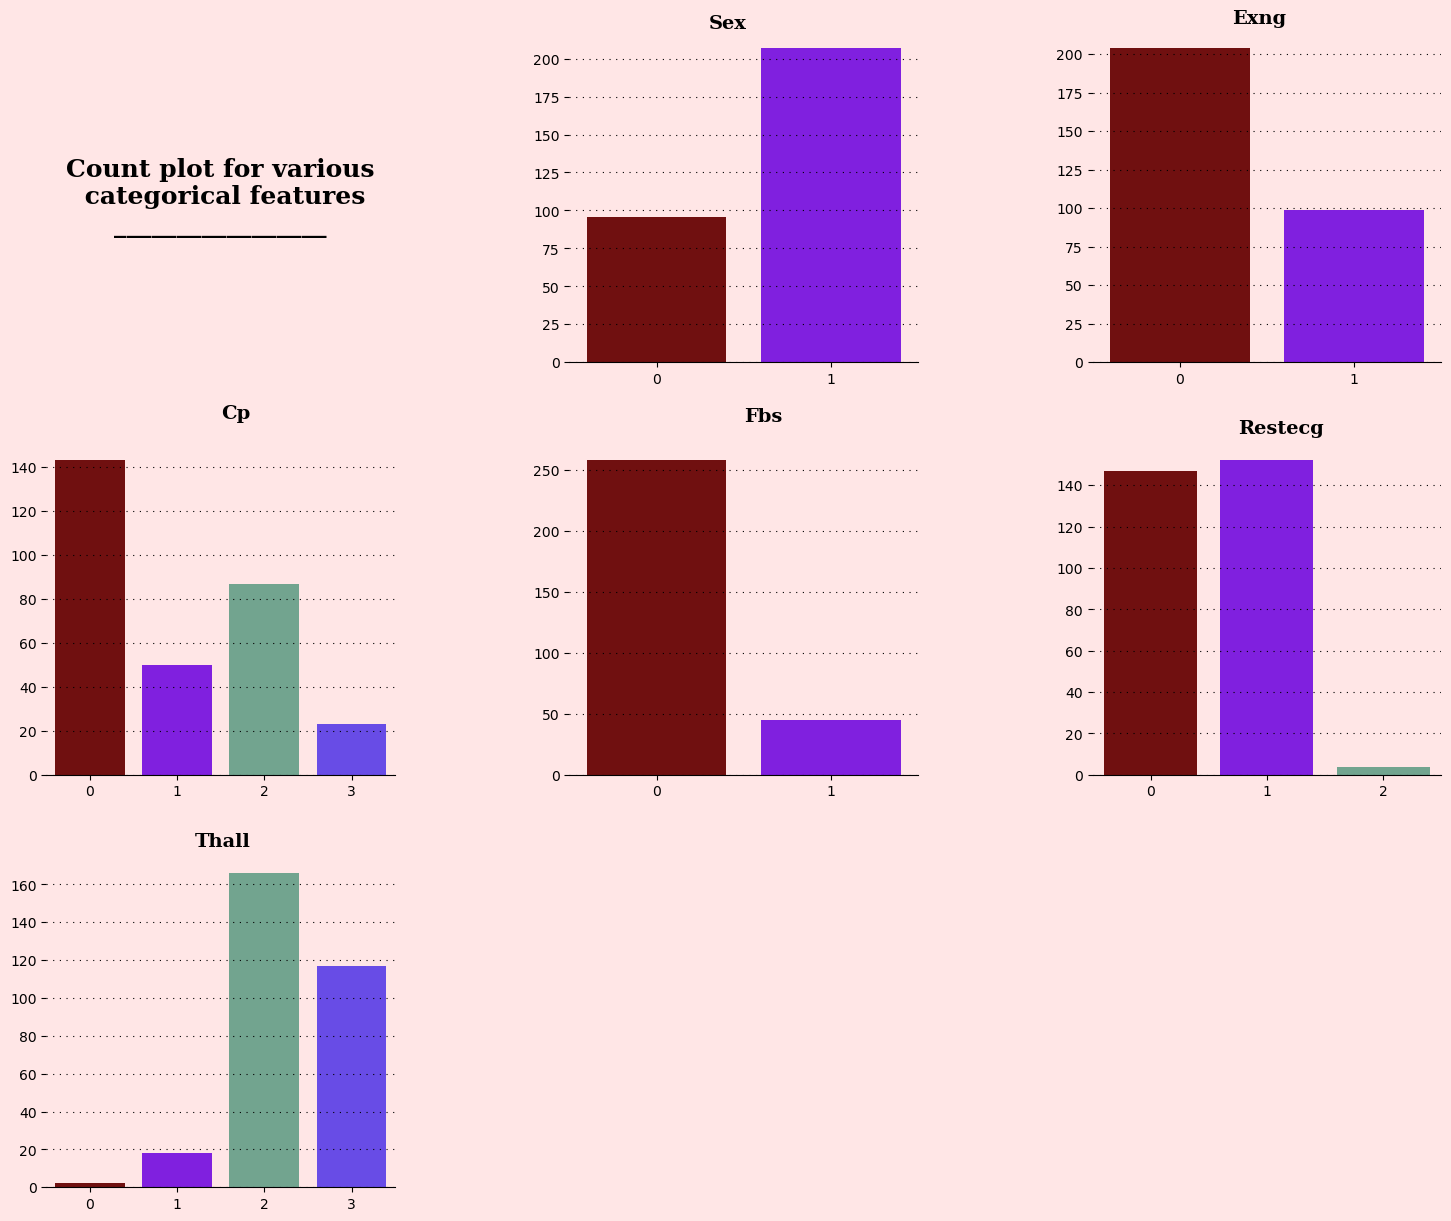

In [28]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])


background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")



# Cp count
ax3.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='cp',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Fbs count
ax4.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='fbs',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Restecg count
ax5.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='restecg',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")



# Thall count
ax6.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='thall',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
  

- Males are at a higher risk of heart attack than females.
- Ratio of people who experienced excercise induced angina and those who don't is 1:2.
- Most of the people who are at the risk of heart attack experience typical angina chest pain and least of them are asymptotic.
- Less than 20% of the people have their fasting blood sugar >120 mg/dl.
- Most of the people have ST-T wave normality and approx only 4% of people have left ventricular hypertrophy.
- The values of a thallium stress test (0-3) typically represent different levels of blood flow to the heart muscle. Here, most of the people have moderate abnormalities, moderately reduced blood flow to a larger area of the heart muscle.(thall=2)

<Axes: >

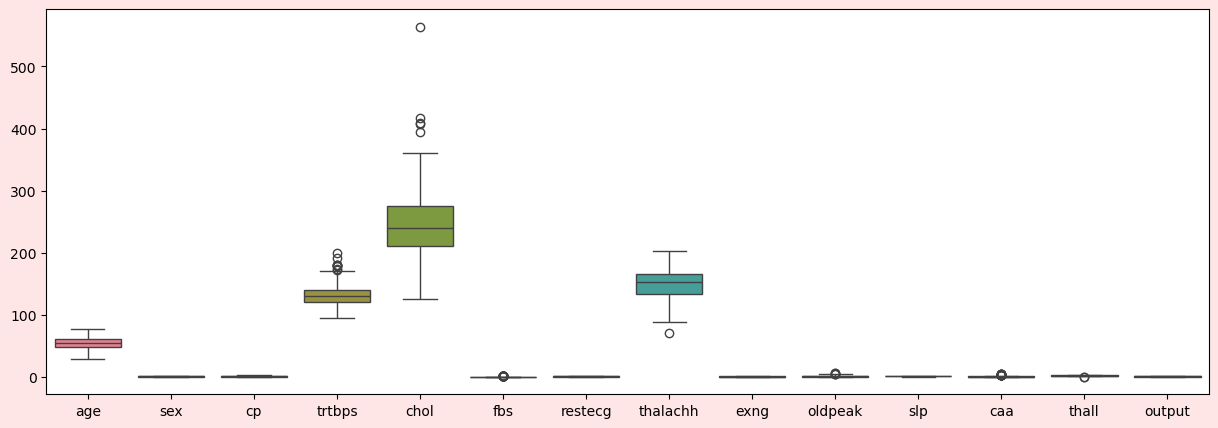

In [30]:
plt.figure(figsize=(15, 5), facecolor= "#ffe6e6")

plt.tight_layout()
sns.boxplot(df)

# Bivariate Analysis

<Figure size 1000x600 with 0 Axes>

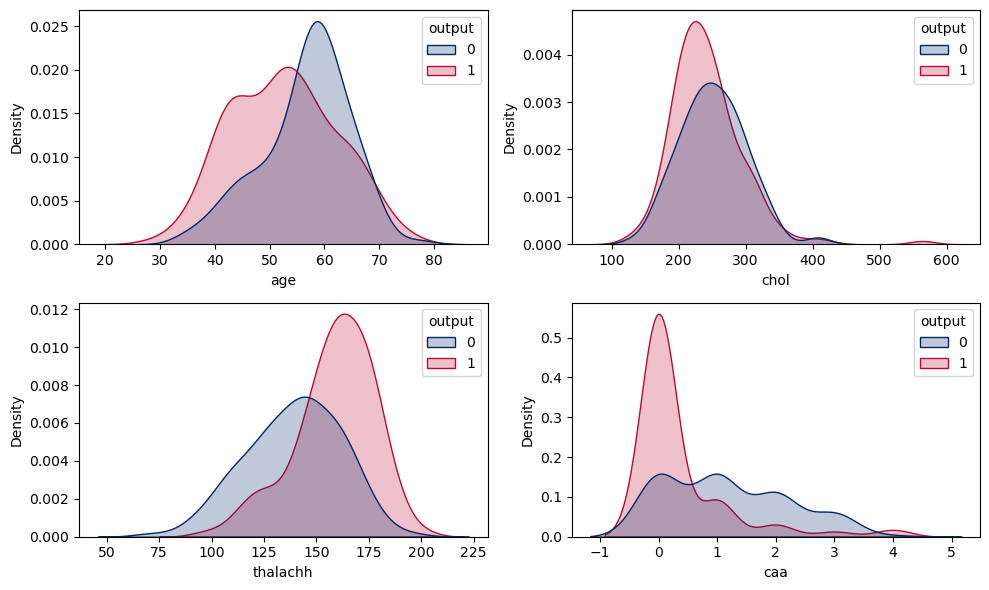

In [32]:
plt.figure(figsize=(10,6), facecolor= "#ffe6e6")
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes = axes.flatten()

sns.kdeplot(data=df, x='age' ,hue='output', fill=True,palette=["#002868","#BF0A30"] ,ax=axes[0])
sns.kdeplot(data=df, x='chol' ,hue='output', fill=True,palette=["#002868","#BF0A30"],ax=axes[1])
sns.kdeplot(data=df, x='thalachh' ,hue='output', fill=True,palette=["#002868","#BF0A30"],ax=axes[2])
sns.kdeplot(data=df, x='caa' ,hue='output', fill=True,palette=["#002868","#BF0A30"],ax=axes[3])
plt.tight_layout()
plt.show()

- People lying in range of (50-60) years of age have high risk of heart attack.
- (170-180)bpm was the maximum heart rate achieved by the individuals who have high risk of heart attack.
- The plot for caa shows a more distinct separation between low and high risk of heart attack, especially around the value 0. This suggests that the number of major blood vessels is a significant factor in determining heart attack risk.
- 
Overlap in chol: The plot for chol shows a significant overlap between low and high risk groups. This indicates that cholesterol levels alone might not be as strong a predictor of heart attack risk compared to caa.




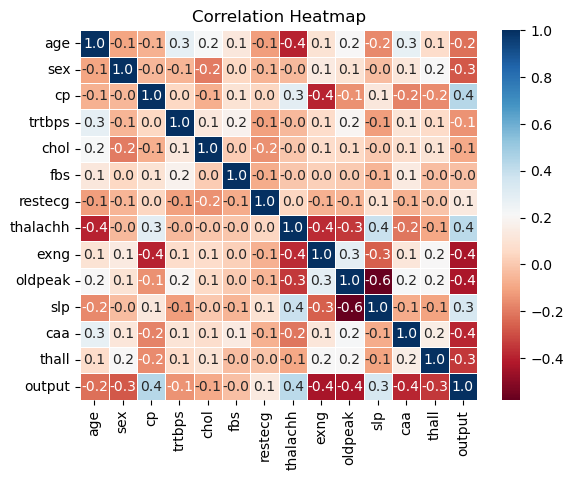

In [34]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu',fmt='.1f', linewidth=.70)
plt.title('Correlation Heatmap')

plt.show()


# Feature Engineering

****

In [37]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()


The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


# Linear Regression Model

In [40]:
lr_model = LinearRegression() # Creating a linear regression model
lr_model.fit(X_train, y_train) # Training the model on the training set

"Model Trained"

'Model Trained'

In [41]:
y_pred = lr_model.predict(X_test) # Predicting the chances of heart attack using the testing set

r_squared = r2_score(y_test, y_pred) # Calculating R-squared and Mean Squared Error

mse = mean_squared_error(y_test, y_pred)

r_squared, mse

(0.5381802453978966, 0.11517568725362862)

- Evaluated the model performance using appropriate metrixs (e.g., R-squared, Mean Squared Error).


- R-squared (Coefficient of Determination): 0.5381
This value indicates that approximately 53.81% of the variance in the target variable (charges) can be explained by the features in your model. 

- Mean Squared Error (MSE): 0.1151
MSE is a measure of the average squared difference between the actual and predicted values. A lower MSE indicates that, on average, the model's predictions are closer to the true values.

# SVM

In [44]:
model = SVC()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  85.24590163934425 %


C:\Users\91703\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Logistic Regression

In [46]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))


The test accuracy score of Logistric Regression is  0.9016393442622951


C:\Users\91703\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Decision Tree

In [48]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


# Random Forest

In [50]:
# instantiating the object
rf = RandomForestRegressor()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

C:\Users\91703\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The test accuracy score of Random Forest is  0.7868852459016393


# Gradient Boosting Classifier

In [52]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

C:\Users\91703\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934


- Most of the models are performing well.
- Logistic Regression model is the best working model having an accuracy score of 90.16%